<a href="https://colab.research.google.com/github/chrisfinan/IDS/blob/main/problem1_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chris Finan
> 10/27/23

> Project 4








###Description:


> In this notebook, I am examining the "adult training" data set. I clean this data set and analyze it using different methods, such as plotting bar charts and histograms as well as using contingency tables. I also analyze the dataset by lowering the range of ages to see if there are any changes. This notebook is coded solely in R.



## 1. Use the following dataset about adults: https://github.com/bforoura/IDS/blob/main/HW4/adult_training.csv

In [255]:
# Let's read in the data file
library(readr)
adult_training <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv", show_col_types = FALSE)

In [256]:
# Convert to data frame and summarize
summary(adult_training)

      age         workclass           education     marital-status    
 Min.   :17.00   Length:14797       Min.   : 1.00   Length:14797      
 1st Qu.:28.00   Class :character   1st Qu.: 9.00   Class :character  
 Median :37.00   Mode  :character   Median :10.00   Mode  :character  
 Mean   :38.69                      Mean   :10.07                     
 3rd Qu.:48.00                      3rd Qu.:12.00                     
 Max.   :90.00                      Max.   :16.00                     
  occupation            sex             capital-gain    capital-loss    
 Length:14797       Length:14797       Min.   :    0   Min.   :   0.00  
 Class :character   Class :character   1st Qu.:    0   1st Qu.:   0.00  
 Mode  :character   Mode  :character   Median :    0   Median :   0.00  
                                       Mean   : 1067   Mean   :  88.58  
                                       3rd Qu.:    0   3rd Qu.:   0.00  
                                       Max.   :99999   Max.   :43

In [257]:
#Converts the column's 0 values as well as 99999 values (which are most likely errors) to null values so that the the values other than the max can be observed
adult_training$`capital-gain` <- ifelse(adult_training$`capital-gain` == 0, yes = NA, no = adult_training$`capital-gain`)
adult_training$`capital-gain` <- ifelse(adult_training$`capital-gain` == 99999, yes = NA, no = adult_training$`capital-gain`)
adult_training$`capital-loss` <- ifelse(adult_training$`capital-loss` == 0, yes = NA, no = adult_training$`capital-loss`)

In [258]:
#Fill in unnecessary 0 and 99999 values that were set to na - the mean is calculated  without the na values
adult_training$`capital-gain` <- ifelse(is.na(adult_training$`capital-gain`), mean(adult_training$`capital-gain`, na.rm = TRUE), adult_training$`capital-gain`)
adult_training$`capital-loss` <- ifelse(is.na(adult_training$`capital-loss`), mean(adult_training$`capital-loss`, na.rm = TRUE), adult_training$`capital-loss`)


In [259]:
#Display the summary of the cleaned data set
#There are no more noisy values that are out of the ordinary
summary(adult_training)

      age         workclass           education     marital-status    
 Min.   :17.00   Length:14797       Min.   : 1.00   Length:14797      
 1st Qu.:28.00   Class :character   1st Qu.: 9.00   Class :character  
 Median :37.00   Mode  :character   Median :10.00   Mode  :character  
 Mean   :38.69                      Mean   :10.07                     
 3rd Qu.:48.00                      3rd Qu.:12.00                     
 Max.   :90.00                      Max.   :16.00                     
  occupation            sex             capital-gain    capital-loss 
 Length:14797       Length:14797       Min.   :  114   Min.   : 213  
 Class :character   Class :character   1st Qu.: 7637   1st Qu.:1878  
 Mode  :character   Mode  :character   Median : 7637   Median :1878  
                                       Mean   : 7637   Mean   :1878  
                                       3rd Qu.: 7637   3rd Qu.:1878  
                                       Max.   :41310   Max.   :4356  
    income   

## 2. Create a contingency table of workclass and sex, and plot it.

In [260]:
#Create contingency table
atTable <- table(adult_training$sex, adult_training$workclass)
#Display table
ftable(atTable)

           ? Federal-gov Local-gov Never-worked Private Self-emp-inc Self-emp-not-inc State-gov Without-pay
                                                                                                           
Female   377         149       377            1    3574           54              178       201           1
Male     452         305       592            4    6707          444              992       385           4

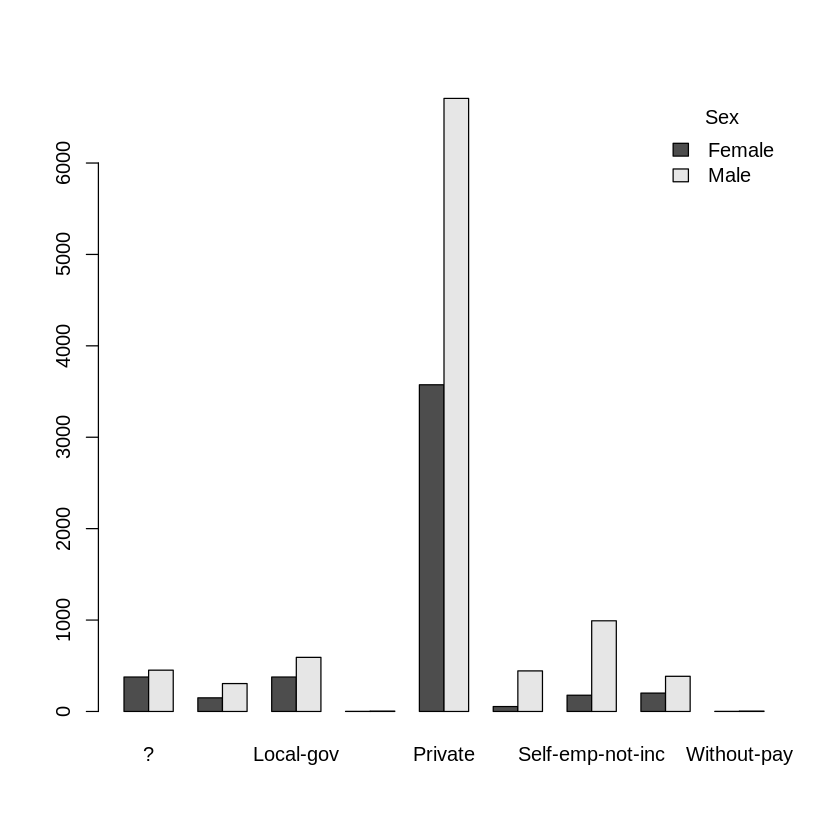

In [261]:
barplot(atTable, #create barplot fot sex and workclass
legend.text = c("Female", "Male"), args.legend = list(title = "Sex", x = "topright", bty = "n"), #Display key to distinguish colors
beside = TRUE) #make chart more readable with side by side bars

As you can see based on the charts above, most of both males and females are privately employed. Almost no one has never worked or been without pay (these 2 are basically the same as they have the same numbers). There are many more men than women that were recorded in this data set as being a part of a specific work class. The values that are the most similar between males and females are unknown (?) and never-worked/without-pay.

## 3. Create a contingency table of sex and marital status, and plot it.

In [262]:
#Create contingency table
smTable <- table(adult_training$sex, adult_training$`marital-status`)
#Display table
ftable(smTable)

        Divorced Married-AF-spouse Married-civ-spouse Married-spouse-absent Never-married Separated Widowed
                                                                                                           
Female      1219                 7                761                    95          2160       290     380
Male         795                 4               6010                   104          2717       182      73

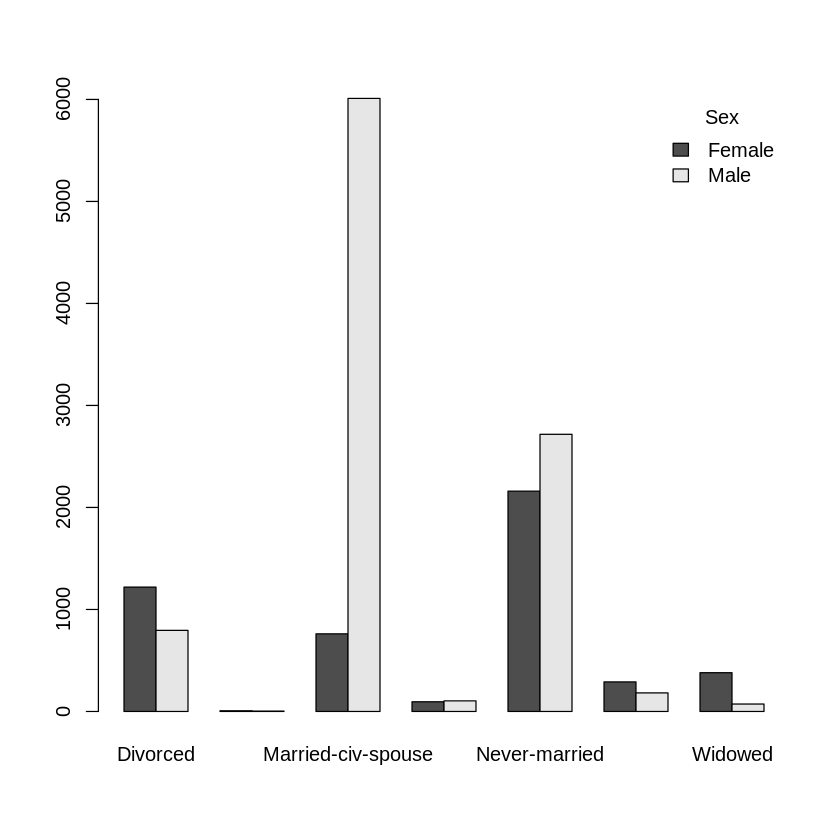

In [263]:
barplot(smTable, #create barplot fot sex and marital-status
legend.text = c("Female", "Male"), args.legend = list(title = "Sex", x = "topright", bty = "n"), #Display key to distinguish colors
beside = TRUE) #make chart more readable with side by side bars

Most of the different marital statuses are relatively similar, except when it comes to "Married-civ-spouse" where males have over 5,000 more in this category than females. Males also lead in the "Never-married" category by a decent margin and in "Married-spouse-absent" by only 9. However, more females than men are listed as divorced, separated, or widowed. Females also lead in "Married-AF-spouse," but these numbers are so small in general that they are only above males by 3.

## 4. Create a new data frame, adultOver40, for those whose age > 40.

In [264]:
# Make a copy of the cleaned data set
adultOver40 <- adult_training
# Remove all values that are less than 40
adultOver40 <- adultOver40[!(adultOver40$age < 40), ]
# Display the new data frame
print(adultOver40)

# A tibble: 6,510 × 9
     age workclass    education `marital-status` occupation sex   `capital-gain`
   <dbl> <chr>            <dbl> <chr>            <chr>      <chr>          <dbl>
 1    50 Self-emp-no…        13 Married-civ-spo… Exec-mana… Male           7637.
 2    49 Private              5 Married-spouse-… Other-ser… Fema…          7637.
 3    52 Self-emp-no…         9 Married-civ-spo… Exec-mana… Male           7637.
 4    40 Private             11 Married-civ-spo… Craft-rep… Male           7637.
 5    43 Private              7 Married-civ-spo… Transport… Male           7637.
 6    54 ?                   10 Married-civ-spo… ?          Male           7637.
 7    44 Private             14 Divorced         Exec-mana… Fema…          7637.
 8    50 Federal-gov         13 Divorced         Exec-mana… Male           7637.
 9    47 Self-emp-inc         9 Divorced         Exec-mana… Male           7637.
10    43 Private             10 Married-civ-spo… Tech-supp… Male           7637.
# ℹ 6,

## 5. Recreate the contingency table of sex and marital status for adultOver40.

In [265]:
#Create contingency table
smTable2 <- table(adultOver40$sex, adultOver40$`marital-status`)
#Display table
ftable(smTable2)

        Divorced Married-AF-spouse Married-civ-spouse Married-spouse-absent Never-married Separated Widowed
                                                                                                           
Female       769                 0                332                    41           290       147     356
Male         476                 1               3554                    50           342        81      71

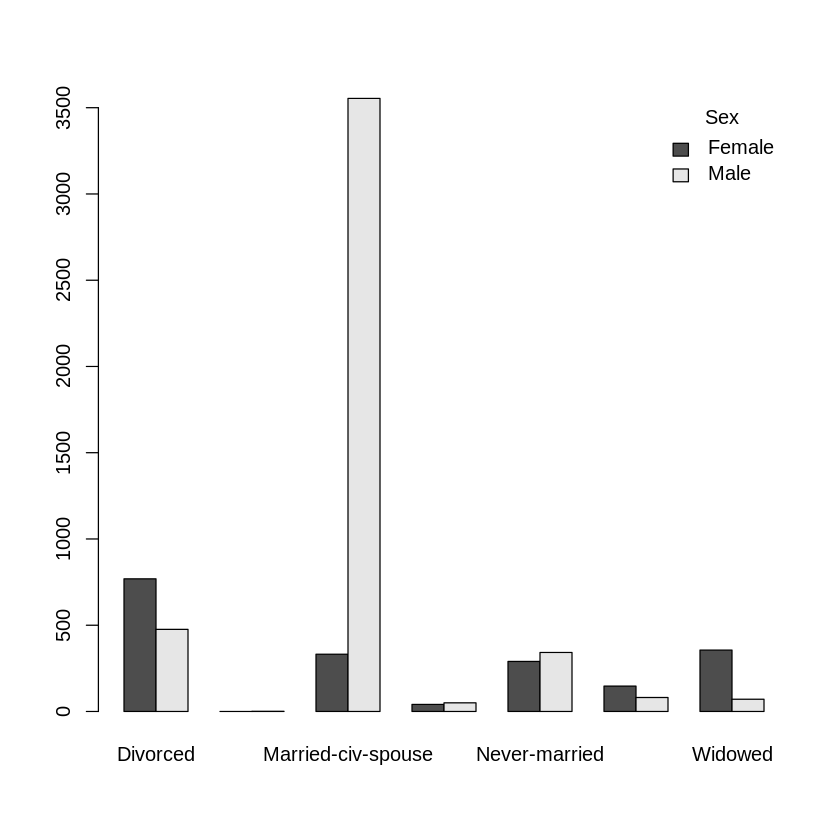

In [266]:
barplot(smTable2, #create barplot fot sex and marital-status for adults over 40
legend.text = c("Female", "Male"), args.legend = list(title = "Sex", x = "topright", bty = "n"), #Display key to distinguish colors
beside = TRUE) #make chart more readable with side by side bars

Even though the sample size is smaller than before, with only people over 40, the proportions between male and female are still relatively the same for marital status. Males are still ahead in "Married-civ-spouse" by a substantial margin. The gap between males and females is closer for "Never-married," but males still have more. The difference between males and females for "Married-spouse-absent" is exactly 9 again with males having more. Females are still leading in divorced, separated and widowed. The one difference is that males now have more than females in "Married-AF-spouse" even though the overall numbers are very small (1 vs 0).

## 6. Determine whether any outliers exist for the education field.

In [267]:
summary(adult_training$education)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    9.00   10.00   10.07   12.00   16.00 

In [268]:
#Create a new column and scale the education data
adult_training$scaled_education <- scale(x = adult_training$education)
#Print out the summary of the new scaled column
summary(adult_training$scaled_education)

       V1          
 Min.   :-3.49029  
 1st Qu.:-0.41135  
 Median :-0.02648  
 Mean   : 0.00000  
 3rd Qu.: 0.74326  
 Max.   : 2.28273  

In [269]:
#Define the 3 sigma rule for determining outliers
threeSigRuleEd <- (adult_training$scaled_education > 3) | (adult_training$scaled_education < -3)
#Create a variable that tracks the outliers using the 3 sigma rule
education_outliers <- adult_training$scaled_education[which(threeSigRuleEd)]

#Print out the number of education outliers
cat("number of outliers in education =", length(education_outliers))


number of outliers in education = 113

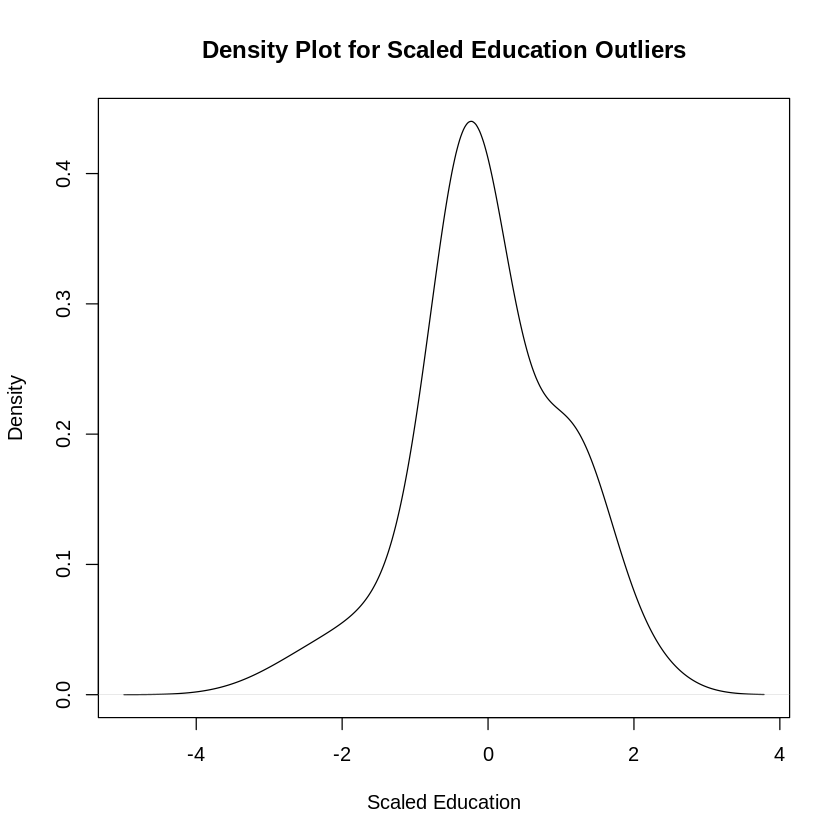

In [270]:
plot(density(adult_training$scaled_education, bw = 0.5), main = "Density Plot for Scaled Education Outliers", xlab = "Scaled Education")

First I displayed the original education data, then I scaled it to determine the outliers. I concluded that there are a total of 113 outliers out of 14797 values in education. Displaying the count of outliers, the described table, and the density curve allow the viewer to visualize the few outliers that appear in "eduation." As you can see, the code for defining outliers and scaling data is much simpler in R than in Python.

## 7. Standardize (zero mean) the age variable, and identify how many outliers there are. What is the most extreme outlier?

In [271]:
summary(adult_training$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   28.00   37.00   38.69   48.00   90.00 

In [272]:
#Create a new column and scale the age data
adult_training$scaled_age <- scale(x = adult_training$age)
#Print out the summary of the new scaled column
summary(adult_training$scaled_age)

       V1         
 Min.   :-1.5855  
 1st Qu.:-0.7813  
 Median :-0.1234  
 Mean   : 0.0000  
 3rd Qu.: 0.6808  
 Max.   : 3.7512  

In [273]:
#Define the 3 sigma rule for determining outliers
threeSigRuleAge <- (adult_training$scaled_age > 3) | (adult_training$scaled_age < -3)
#Create a variable that tracks the outliers using the 3 sigma rule
age_outliers <- adult_training$scaled_age[which(threeSigRuleAge)]

#Print out the number of age outliers
cat("number of outliers in age =", length(age_outliers))

number of outliers in age = 60

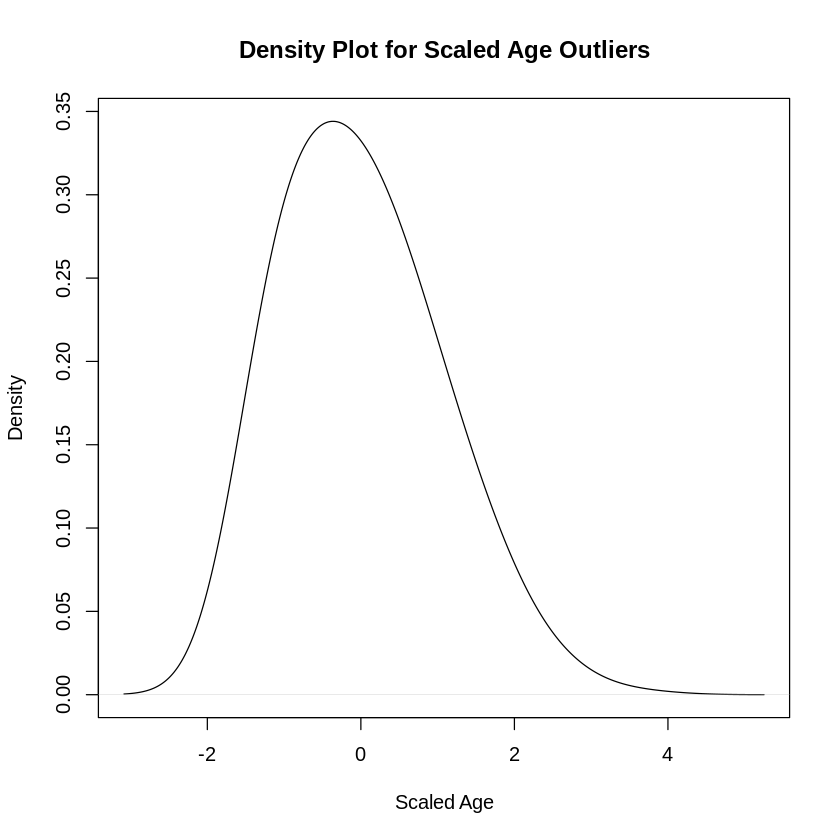

In [274]:
plot(density(adult_training$scaled_age, bw = 0.5), main = "Density Plot for Scaled Age Outliers", xlab = "Scaled Age")

To determine the outliers, I went through the same process I did as education.The graphs and tables visualize the data where there is a total of 60 outliers.The most extreme outlier is the maximum value, which is 90. This value checks all the boxes of being an outlier through the steps I went through above and it is the most extreme because it is the farthest away from any of the quartiles (specifically Q3). The max is > 3 which classifies it as an outlier and you can see right before +4 that the density curve has not fully flattened out yet.

## 8. Age anomaly? Select only records with age at least 80, and construct a histogram of age. Explain what you see.

In [275]:
# Make a copy of the cleaned data set
atLeast80 <- adult_training
# Remove all values that are less than 80
atLeast80 <- atLeast80[!(atLeast80$age < 80), ]
# Display the new data frame
print(atLeast80)

# A tibble: 60 × 11
     age workclass    education `marital-status` occupation sex   `capital-gain`
   <dbl> <chr>            <dbl> <chr>            <chr>      <chr>          <dbl>
 1    90 Private              9 Never-married    Other-ser… Male           7637.
 2    80 ?                    9 Widowed          ?          Male           7637.
 3    90 Private              9 Never-married    Other-ser… Fema…          7637.
 4    88 Self-emp-no…        15 Married-civ-spo… Prof-spec… Male           7637.
 5    90 Private             13 Married-civ-spo… Exec-mana… Male           7637.
 6    90 Private             10 Never-married    Other-ser… Male           7637.
 7    82 ?                    4 Widowed          ?          Male           7637.
 8    90 Private              5 Never-married    Adm-cleri… Fema…          7637.
 9    80 Private             14 Widowed          Prof-spec… Fema…          7637.
10    90 Local-gov           14 Married-civ-spo… Exec-mana… Male          20051 
# ℹ 50 m

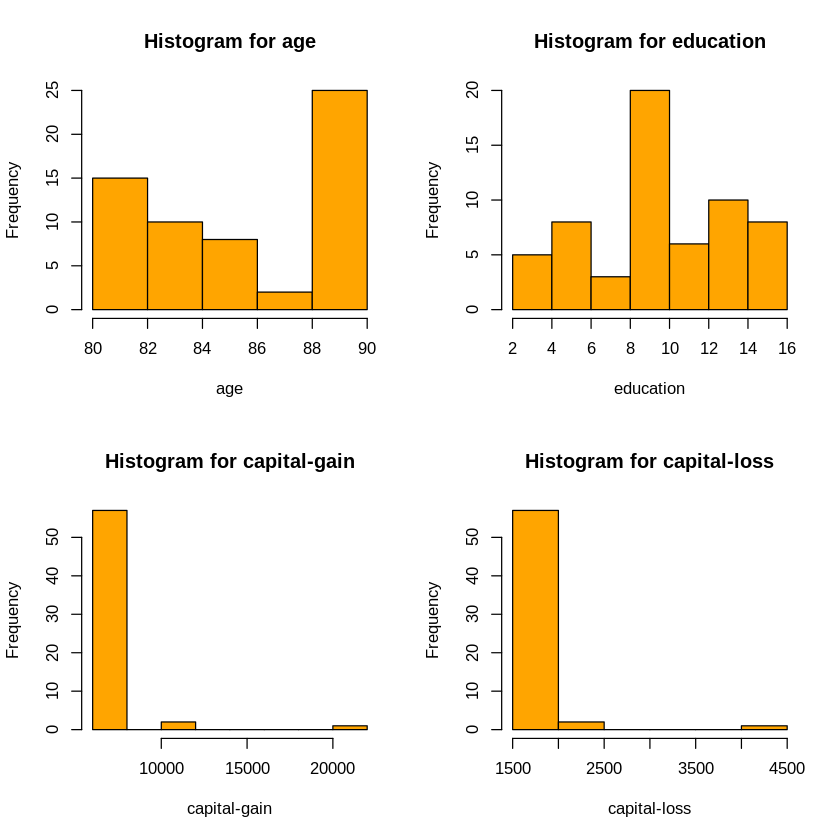

In [276]:
#Make code more readable by selecting necessary columns and putting into a variable
selected_cols <- atLeast80[c('age', 'education', 'capital-gain', 'capital-loss')]
#Make a for loop to print out each histogram

#Set up 2x2 grid of histograms to match the Python one
par(mfrow = c(2, 2))

for (col in colnames(selected_cols)) {
  hist(selected_cols[[col]],
       col = 'orange',
       border = 'black',
       main = paste("Histogram for", col),
       xlab = col,
       ylab = "Frequency",
       breaks = 5,
       right = FALSE)
}



The one thing that I noticed in the histograms for those who are the age of 80 or older is that there tends to be one section that occurs much more frequently than the others for each chart. The ages between 88 and 90 take up about 25% of this data set. The next values are 15%. For 'education,' the values between about 8 to 10 occur over 25% of the time as well. The next values are about 12%. For 'capital-gain' the values between about 8000 to 10000 occur almost 60% of the time. 'Capital-loss' also takes up almost 60% with the values between about 1500 and 2300. The percentages for all of the other value ranges for both 'capital-gain' and 'capital-loss' do not individually add up to more than 5%. The reason for so many of the capital gain and loss values being in the same range could be due to the fact that many of their values were originally missing or incorrect and needed to be imputed as the average. A notable difference between R and Python is that I needed a for loop to print out all of the histograms in this problem. Also in R, I found that the default for histograms is that the right bound of each bar is included(]). I had to set this to false to match the Python histograms and make it more understandable.

## 9. Summarize your findings.


- I originally discovered that there was some issues with the values in the data set. I had to clean the data set of any noise and impute the necessary averages to make sure all of the inputs were valid.
- When taking a look at sex vs workclass, I noticed that many more males than females were recorded in this data set. Males were higher in almost every work class by a substantial margin. The ones labeled ?,' 'never-worked,' and 'without-pay' were the closest between the sexes.
- When comparing sexes to marital status, I noticed that females were higher than males in 'divorced,' 'separated,' and 'widowed.' For 'married-civ-spouse,' males had a much larger margin over females. Other than that, the values between the sexes were much more negligible.
- When lowering the range to people over 40, the ratios mostly stayed the same between males and females. The one difference is that males had more than females in "Married-AF-spouse" even though the overall numbers are very small (1 vs 0).
- I found that there were 113 outliers in the 'education' column by scaled the data and using the 3-sigma rule. I used the same methods to discover that there were 60 outliers in the 'age' column. The most extreme age outlier is 90.
- When taking a look at the data set for people who are at least 80 years old, I noticed that there was a trend where a few values in a range would appear much more than the rest of the values. Many of the values were also the same due to imputing in the beginning.
- R has simpler syntax than Python in some aspects such as scaling

### Sources
- https://github.com/bforoura/IDS/blob/main/Portuguese_Bank_Python.ipynb
- https://github.com/bforoura/IDS/blob/main/HW4/adult_training.csv